In [ ]:
# pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 5.IMPORTO LOS DATOS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

## Defino la raíz del sistema de archivos
raiz = "/content/drive/MyDrive/DataGobAnt"

Mounted at /content/drive


In [ ]:
FULL_GLOBAL = pd.read_pickle(raiz + '/3.business/FULL_GLOBAL.p')

In [ ]:
FULL_GLOBAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800420 entries, 0 to 800419
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   CuentaContr            800420 non-null  object         
 1   PSOBKEY                800420 non-null  object         
 2   PARTNER                800420 non-null  object         
 3   PARTNERACCTYP          800420 non-null  float64        
 4   Vigencia               800420 non-null  int64          
 5   TIPO_DOCUMENTO_IC      702106 non-null  object         
 6   DEPARTAMENTO_IC        701753 non-null  object         
 7   CIUDAD_IC              699090 non-null  object         
 8   OBSOLETO_IC            702106 non-null  object         
 9   FECHA_MODIFICACION_IC  702106 non-null  datetime64[ns] 
 10  MODELO                 773964 non-null  float64        
 11  CODUSO                 773964 non-null  float64        
 12  CODMARCA               773892 

## Acoto aquellos registros que tengan 1 en Veri_pagos o en Veri_partAb

In [ ]:
# PRIMERO HAGO LA SUMA DE REGISTROS QUE CUMPLEN ESTA RESTRICCIÓN, SUMANDO Veri_pagos y Veri_partAb
FULL_GLOBAL['Veri'] = FULL_GLOBAL['Veri_pagos'] + FULL_GLOBAL['Veri_partAb']

In [ ]:
pd.Series(FULL_GLOBAL[['Veri']].value_counts()).to_frame()

0
Veri        
1     550627
0     247822
2       1971

In [ ]:
# Entonces el total de registros que debería quedar es
550627 + 1971

552598

In [ ]:
# ACOTO

FULL_GLOBAL = FULL_GLOBAL[FULL_GLOBAL['Veri']>0]


In [ ]:
FULL_GLOBAL['Veri'].info()

# El número de registros es correcto

<class 'pandas.core.series.Series'>
Int64Index: 552598 entries, 0 to 800418
Series name: Veri
Non-Null Count   Dtype
--------------   -----
552598 non-null  int64
dtypes: int64(1)
memory usage: 8.4 MB


## Elimino 'Veri' y 'Veri_partAb'

In [ ]:
FULL_GLOBAL.drop(['Veri_partAb','Veri'], axis=1, inplace=True)

## Separo la data para hacer la prueba  Dickey Fuller

In [ ]:
Prueba_DF = FULL_GLOBAL[['VALUT', 'IMP80', 'IMP20']].copy(deep=True)

In [ ]:
Prueba_DF['IMP'] = FULL_GLOBAL['IMP80'] + FULL_GLOBAL['IMP20']

In [ ]:
Prueba_DF.dropna(inplace=True)

In [ ]:
Prueba_DF = pd.Series(Prueba_DF.groupby(['VALUT'])['IMP'].sum().apply(lambda x: format(x, 'f'))).to_frame()

## PASO FECHAS Y TIMEDELTA TO STRINGS

In [ ]:

FULL_GLOBAL["FECHA_MODIFICACION_IC"] = FULL_GLOBAL["FECHA_MODIFICACION_IC"].astype(str)
FULL_GLOBAL["VALUT"] = FULL_GLOBAL["VALUT"].astype(str)
FULL_GLOBAL["Demora"] = FULL_GLOBAL["Demora"].astype(str)
FULL_GLOBAL["Demora"] = FULL_GLOBAL["Demora"].str.replace(' days','')
FULL_GLOBAL["Demora"] = FULL_GLOBAL["Demora"].str.replace('NaT','0')

## Convierto la demora a números
FULL_GLOBAL["Demora"] = FULL_GLOBAL["Demora"].astype(int)

In [ ]:
## Miro que si haya 0 y 1 en veri pagos
pd.Series(FULL_GLOBAL.groupby(['Veri_pagos']).size()).to_frame()

0
Veri_pagos        
0            70739
1           481859

In [ ]:
## Todos los registros tienen demora
FULL_GLOBAL[FULL_GLOBAL["Demora"].isnull()]

Empty DataFrame
Columns: [CuentaContr, PSOBKEY, PARTNER, PARTNERACCTYP, Vigencia, TIPO_DOCUMENTO_IC, DEPARTAMENTO_IC, CIUDAD_IC, OBSOLETO_IC, FECHA_MODIFICACION_IC, MODELO, CODUSO, CODMARCA, CODCLASE, CILIND, AVALUO, GPART, VTREF, VALUT, IMP80, IMP20, AVALUO_HistPagos, TXTPAYTP, Veri_pagos, Demora]
Index: []

[0 rows x 25 columns]

In [ ]:
## LLENO LOS NA CON 0
FULL_GLOBAL=FULL_GLOBAL.fillna(0)

In [ ]:
FULL_GLOBAL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552598 entries, 0 to 800418
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CuentaContr            552598 non-null  object 
 1   PSOBKEY                552598 non-null  object 
 2   PARTNER                552598 non-null  object 
 3   PARTNERACCTYP          552598 non-null  float64
 4   Vigencia               552598 non-null  int64  
 5   TIPO_DOCUMENTO_IC      552598 non-null  object 
 6   DEPARTAMENTO_IC        552598 non-null  object 
 7   CIUDAD_IC              552598 non-null  object 
 8   OBSOLETO_IC            552598 non-null  object 
 9   FECHA_MODIFICACION_IC  552598 non-null  object 
 10  MODELO                 552598 non-null  float64
 11  CODUSO                 552598 non-null  float64
 12  CODMARCA               552598 non-null  object 
 13  CODCLASE               552598 non-null  float64
 14  CILIND                 552598 non-nu

In [ ]:
pd.Series(FULL_GLOBAL.groupby(['Veri_pagos']).size()).to_frame()

0
Veri_pagos        
0            70739
1           481859

In [ ]:
## CONVIERTO LAS COLUMNAS OBJECT A NUMÉRICAS 

#get all categorical columns
cat_columns = FULL_GLOBAL.select_dtypes(['object']).columns

#convert all categorical columns to numeric
FULL_GLOBAL[cat_columns] = FULL_GLOBAL[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [ ]:
FULL_GLOBAL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552598 entries, 0 to 800418
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CuentaContr            552598 non-null  int64  
 1   PSOBKEY                552598 non-null  int64  
 2   PARTNER                552598 non-null  int64  
 3   PARTNERACCTYP          552598 non-null  float64
 4   Vigencia               552598 non-null  int64  
 5   TIPO_DOCUMENTO_IC      552598 non-null  int64  
 6   DEPARTAMENTO_IC        552598 non-null  int64  
 7   CIUDAD_IC              552598 non-null  int64  
 8   OBSOLETO_IC            552598 non-null  int64  
 9   FECHA_MODIFICACION_IC  552598 non-null  int64  
 10  MODELO                 552598 non-null  float64
 11  CODUSO                 552598 non-null  float64
 12  CODMARCA               552598 non-null  int64  
 13  CODCLASE               552598 non-null  float64
 14  CILIND                 552598 non-nu

## Matriz de correlación

In [ ]:
corr = FULL_GLOBAL.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

<Axes: >

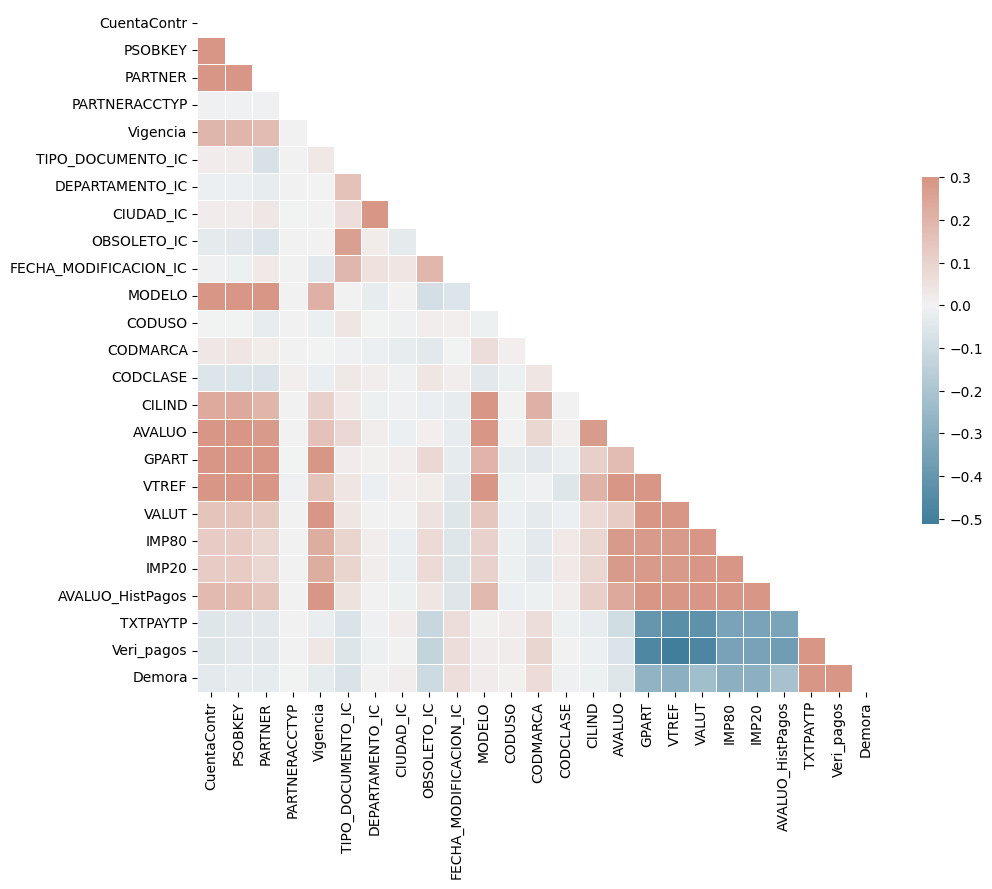

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Hago una copia profunda para correr los modelos


In [ ]:
FULL_GLOBAL_MOD = FULL_GLOBAL.copy(deep=True)

In [ ]:
FULL_GLOBAL_MOD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552598 entries, 0 to 800418
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CuentaContr            552598 non-null  int64  
 1   PSOBKEY                552598 non-null  int64  
 2   PARTNER                552598 non-null  int64  
 3   PARTNERACCTYP          552598 non-null  float64
 4   Vigencia               552598 non-null  int64  
 5   TIPO_DOCUMENTO_IC      552598 non-null  int64  
 6   DEPARTAMENTO_IC        552598 non-null  int64  
 7   CIUDAD_IC              552598 non-null  int64  
 8   OBSOLETO_IC            552598 non-null  int64  
 9   FECHA_MODIFICACION_IC  552598 non-null  int64  
 10  MODELO                 552598 non-null  float64
 11  CODUSO                 552598 non-null  float64
 12  CODMARCA               552598 non-null  int64  
 13  CODCLASE               552598 non-null  float64
 14  CILIND                 552598 non-nu

In [ ]:
## Elimino las variables asociadas con pagos, porque están sobreentrenando el modelo (son variables que no se deberían conocer para la predicción)
FULL_GLOBAL_MOD.drop(['GPART','VTREF','VALUT','IMP80','IMP20','AVALUO_HistPagos','TXTPAYTP'], axis=1, inplace=True)


In [ ]:
FULL_GLOBAL_MOD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552598 entries, 0 to 800418
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CuentaContr            552598 non-null  int64  
 1   PSOBKEY                552598 non-null  int64  
 2   PARTNER                552598 non-null  int64  
 3   PARTNERACCTYP          552598 non-null  float64
 4   Vigencia               552598 non-null  int64  
 5   TIPO_DOCUMENTO_IC      552598 non-null  int64  
 6   DEPARTAMENTO_IC        552598 non-null  int64  
 7   CIUDAD_IC              552598 non-null  int64  
 8   OBSOLETO_IC            552598 non-null  int64  
 9   FECHA_MODIFICACION_IC  552598 non-null  int64  
 10  MODELO                 552598 non-null  float64
 11  CODUSO                 552598 non-null  float64
 12  CODMARCA               552598 non-null  int64  
 13  CODCLASE               552598 non-null  float64
 14  CILIND                 552598 non-nu

## Prueba de Dickey Fuller Aumentada

In [ ]:
#EL DATASET Prueba_DF SE DEFINIÓ ANTERIORMENTE

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Realizo la prueba sobre la columna 
adf = adfuller(Prueba_DF['IMP'], maxlag=1)

## Imprimo los estadísticos
print('El T-Test es:', adf[0])
print('El P-value es:', adf[1])
print('Valores críticos:', adf[4])

# El vector de pagos es estacionario. (Habría que mirar, no para la suma de pagos sino para la cantidad de pagos si se comporta de la misma manera)

El T-Test es: -20.727314492263638
El P-value es: 0.0
Valores críticos: {'1%': -3.4329210547295257, '5%': -2.862675887343983, '10%': -2.567374675294302}


# 6.MODELOS

## Pruebas de Feature Importance

Feature: 0, Score: 0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: 0.05453
Feature: 4, Score: -0.03541
Feature: 5, Score: -0.00224
Feature: 6, Score: 0.00002
Feature: 7, Score: 0.00002
Feature: 8, Score: 0.02159
Feature: 9, Score: -0.00002
Feature: 10, Score: 0.00202
Feature: 11, Score: 0.02264
Feature: 12, Score: -0.00013
Feature: 13, Score: 0.00002
Feature: 14, Score: 0.00001
Feature: 15, Score: -0.00000
Feature: 16, Score: -0.00044


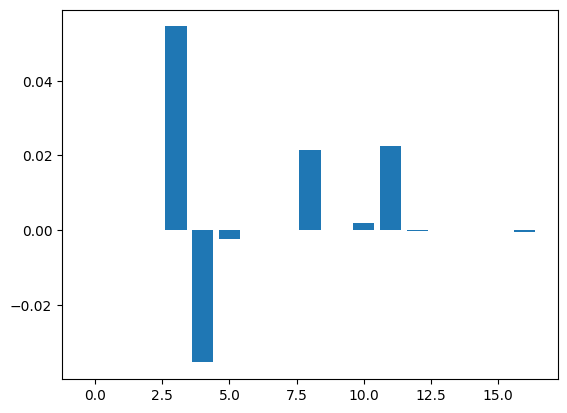

In [ ]:
## # linear regression feature importance

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define dataset
X = FULL_GLOBAL_MOD.drop(['Veri_pagos'], axis=1)
Y = FULL_GLOBAL_MOD['Veri_pagos']

# define the model
model = LinearRegression()

# fit the model
model.fit(X, Y)
# get importance

importance = model.coef_
# summarize feature importance

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature: 0, Score: 0.00001
Feature: 1, Score: -0.00001
Feature: 2, Score: -0.00001
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00094
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00021
Feature: 10, Score: 0.00097
Feature: 11, Score: 0.00000
Feature: 12, Score: -0.00001
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00009
Feature: 15, Score: 0.00000
Feature: 16, Score: -0.00308


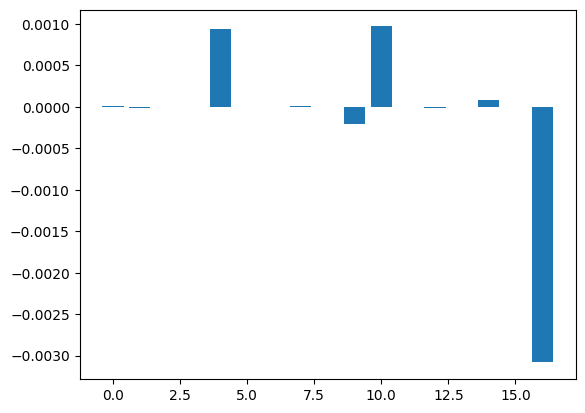

In [ ]:
# logistic regression for feature importance

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define dataset
X = FULL_GLOBAL_MOD.drop(['Veri_pagos'], axis=1)
Y = FULL_GLOBAL_MOD['Veri_pagos']

# define the model
model = LogisticRegression()

# fit the model
model.fit(X, Y)

# get importance
importance = model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00121
Feature: 1, Score: 0.00127
Feature: 2, Score: 0.00129
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.13265
Feature: 5, Score: 0.00023
Feature: 6, Score: 0.00013
Feature: 7, Score: 0.00073
Feature: 8, Score: 0.00021
Feature: 9, Score: 0.00178
Feature: 10, Score: 0.00094
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00043
Feature: 13, Score: 0.00011
Feature: 14, Score: 0.00116
Feature: 15, Score: 0.00172
Feature: 16, Score: 0.85611


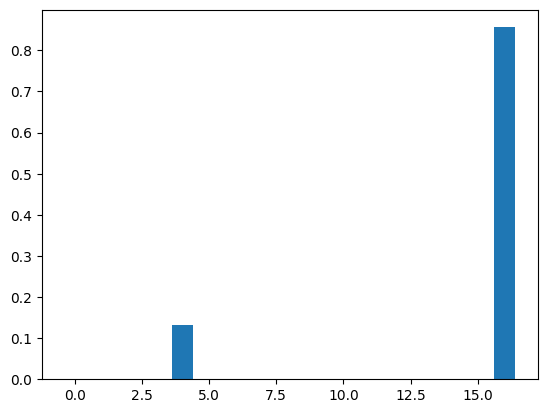

In [ ]:
### Decision Tree Feature Importance

#   classification and regression trees (CART)

# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define dataset
X = FULL_GLOBAL_MOD.drop(['Veri_pagos'], axis=1)
Y = FULL_GLOBAL_MOD['Veri_pagos']

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X, Y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


Feature: 0, Score: 0.00118
Feature: 1, Score: 0.00117
Feature: 2, Score: 0.00129
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.13265
Feature: 5, Score: 0.00019
Feature: 6, Score: 0.00018
Feature: 7, Score: 0.00070
Feature: 8, Score: 0.00021
Feature: 9, Score: 0.00200
Feature: 10, Score: 0.00095
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00047
Feature: 13, Score: 0.00010
Feature: 14, Score: 0.00099
Feature: 15, Score: 0.00182
Feature: 16, Score: 0.85611


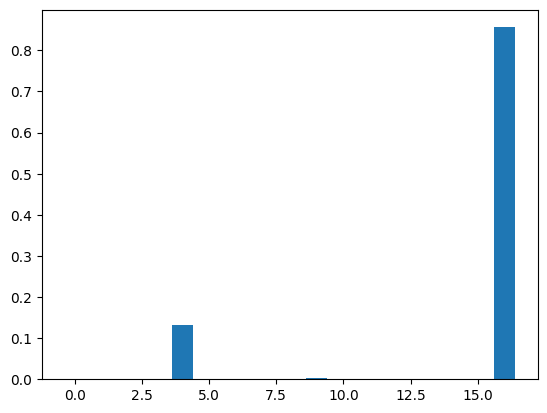

In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define dataset
X = FULL_GLOBAL_MOD.drop(['Veri_pagos'], axis=1)
Y = FULL_GLOBAL_MOD['Veri_pagos']

# define the model
model = DecisionTreeClassifier()

# fit the model
model.fit(X, Y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00118
Feature: 1, Score: 0.00122
Feature: 2, Score: 0.00132
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.13257
Feature: 5, Score: 0.00012
Feature: 6, Score: 0.00019
Feature: 7, Score: 0.00069
Feature: 8, Score: 0.00023
Feature: 9, Score: 0.00183
Feature: 10, Score: 0.00102
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00062
Feature: 13, Score: 0.00019
Feature: 14, Score: 0.00092
Feature: 15, Score: 0.00170
Feature: 16, Score: 0.85621


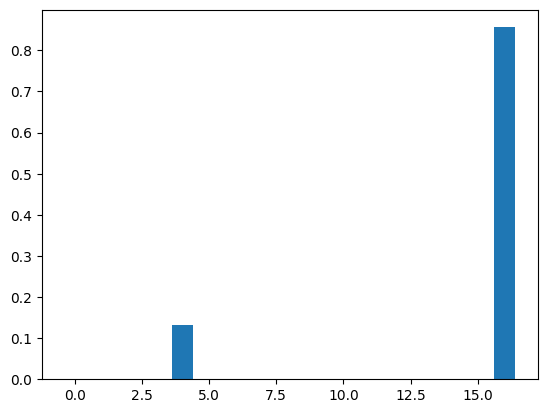

In [ ]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# define dataset
X = FULL_GLOBAL_MOD.drop(['Veri_pagos'], axis=1)
Y = FULL_GLOBAL_MOD['Veri_pagos']

# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X, Y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
## XGBoost Feature Importance

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost
print(xgboost.__version__)

1.7.5


Feature: 0, Score: 0.00064
Feature: 1, Score: 0.00065
Feature: 2, Score: 0.00032
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.18674
Feature: 5, Score: 0.00048
Feature: 6, Score: 0.00039
Feature: 7, Score: 0.00038
Feature: 8, Score: 0.00047
Feature: 9, Score: 0.00047
Feature: 10, Score: 0.00133
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00023
Feature: 13, Score: 0.00018
Feature: 14, Score: 0.00040
Feature: 15, Score: 0.00045
Feature: 16, Score: 0.80688


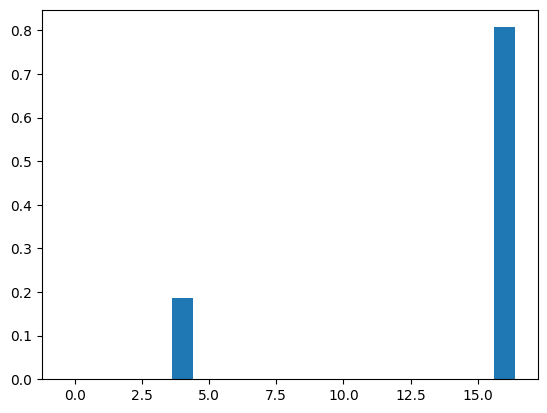

In [ ]:
# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot

# define dataset
X = FULL_GLOBAL_MOD.drop(['Veri_pagos'], axis=1)
Y = FULL_GLOBAL_MOD['Veri_pagos']

# define the model
model = XGBRegressor()

# fit the model
model.fit(X, Y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## 6.1 Random forest

In [ ]:
# Step 1: Identify your dependent (y) and independent variables (X)

X = FULL_GLOBAL_MOD.drop(['Veri_pagos','Demora'], axis=1)
Y = FULL_GLOBAL_MOD['Veri_pagos']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552598 entries, 0 to 800418
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CuentaContr            552598 non-null  int64  
 1   PSOBKEY                552598 non-null  int64  
 2   PARTNER                552598 non-null  int64  
 3   PARTNERACCTYP          552598 non-null  float64
 4   Vigencia               552598 non-null  int64  
 5   TIPO_DOCUMENTO_IC      552598 non-null  int64  
 6   DEPARTAMENTO_IC        552598 non-null  int64  
 7   CIUDAD_IC              552598 non-null  int64  
 8   OBSOLETO_IC            552598 non-null  int64  
 9   FECHA_MODIFICACION_IC  552598 non-null  int64  
 10  MODELO                 552598 non-null  float64
 11  CODUSO                 552598 non-null  float64
 12  CODMARCA               552598 non-null  int64  
 13  CODCLASE               552598 non-null  float64
 14  CILIND                 552598 non-nu

In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 552598 entries, 0 to 800418
Series name: Veri_pagos
Non-Null Count   Dtype
--------------   -----
552598 non-null  int64
dtypes: int64(1)
memory usage: 8.4 MB


### Split aleatorio

In [ ]:
# Step 2: Split the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state=0)

In [ ]:
# Step 3: Training the Random Forest Regression model on the whole dataset

    # n_estimators — the number of decision trees you will be running in the model
    # criterion — this variable allows you to select the criterion (loss function) used to determine model outcomes. We can select from loss functions such as mean squared error (MSE) and mean absolute error (MAE). The default value is MSE.
    # max_depth — this sets the maximum possible depth of each tree
    # max_features — the maximum number of features the model will consider when determining a split
    # bootstrap — the default value for this is True, meaning the model follows bootstrapping principles (defined earlier)
    # max_samples — This parameter assumes bootstrapping is set to True, if not, this parameter doesn’t apply. In the case of True, this value sets the largest size of each sample for each tree.
    # Other important parameters are min_samples_split, min_samples_leaf, n_jobs, and others that can be read in the sklearn’s RandomForestRegressor documentation here.

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [ ]:
# Step 4: Predicting the Test set results
Y_pred = regressor.predict(X_test)
Y_pred

array([1.  , 1.  , 0.44, ..., 0.74, 0.94, 1.  ])

In [ ]:
regressor.score(X,Y)

0.5085792988171728

In [ ]:
# Evalúo el accuracy
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.40773744764395836

In [ ]:
# Calculo el MSE

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
rmse = mse**.5

In [ ]:
mse

0.06627024717301658

In [ ]:
rmse

0.2574300821058343

In [ ]:
RF_pred = pd.DataFrame()
RF_pred['Y_test'] = Y_test.tolist()
RF_pred['Y_pred'] = Y_pred.tolist()
RF_pred

Y_test  Y_pred
0            1    1.00
1            1    1.00
2            0    0.44
3            1    0.89
4            1    0.98
...        ...     ...
442074       1    0.98
442075       0    0.13
442076       1    0.74
442077       1    0.94
442078       1    1.00

[442079 rows x 2 columns]

In [ ]:
pd.Series(RF_pred.groupby(['Y_test', 'Y_pred']).size()).to_frame()

0
Y_test Y_pred       
0      0.00     1345
       0.01      734
       0.02      642
       0.03      612
       0.04      569
...              ...
1      0.96    22039
       0.97    27050
       0.98    34308
       0.99    46384
       1.00    80995

[202 rows x 1 columns]

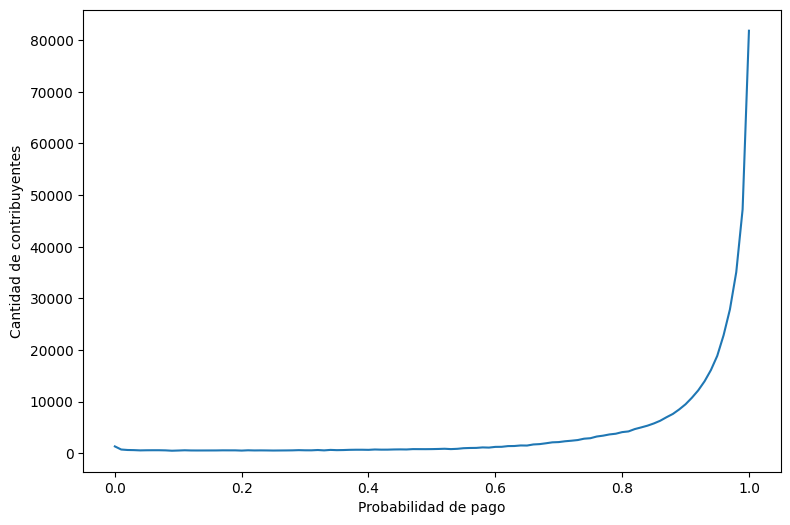

In [ ]:
plt.plot(pd.Series(RF_pred['Y_pred'].value_counts()).to_frame().sort_index())
plt.xlabel('Probabilidad de pago')
plt.ylabel('Cantidad de contribuyentes')
plt.rcParams["figure.figsize"] = [9,6]

Text(0, 0.5, 'Cantidad de contribuyentes')

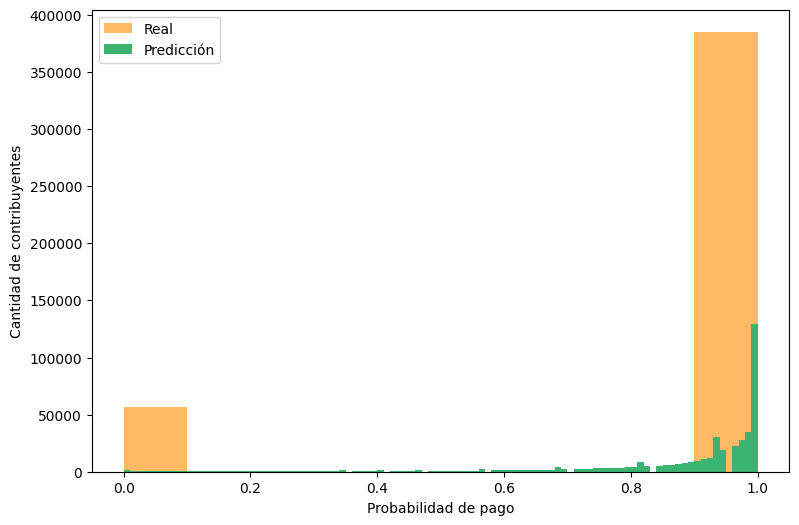

In [ ]:
fig, ax = plt.subplots()

RF_pred['Y_test'].plot(kind = 'hist', color='darkorange', label = 'Real', bins=10, alpha=0.6)
RF_pred['Y_pred'].plot(kind = 'hist', color='mediumseagreen', label = 'Predicción', bins=100)

ax.legend()
ax.set_xlabel('Probabilidad de pago')
ax.set_ylabel('Cantidad de contribuyentes')

In [ ]:
# We achieved an accuracy score of approximately 81%. Let’s compare this to the scores we got with previous regression models:

#     Simple Linear Regression: 50%
#     Multiple Linear Regression: 65%
#     Decision Tree Regression: 65%
#     Support Vector Regression: 71%
#     Random Forest Regression: 81%

### Split de acuerdo a año (test es 2022)

In [ ]:
## X, Y se necesitan para el regr.score
X = FULL_GLOBAL_MOD.drop(['Veri_pagos','Demora'], axis=1)
Y = FULL_GLOBAL_MOD['Veri_pagos']

In [ ]:
# SPLIT TRAIN TEST de acuerdo a año
X_train = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']<2022].drop(['Veri_pagos','Demora'], axis=1)
Y_train = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']<2022]['Veri_pagos']
X_test = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']>=2022].drop(['Veri_pagos','Demora'], axis=1)
Y_test = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']>=2022]['Veri_pagos']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train)

KeyboardInterrupt: ignored

In [ ]:
regressor.score(X,Y)

In [ ]:
# Step 4: Predicting the Test set results
Y_pred = regressor.predict(X_test)
Y_pred

In [ ]:
RF_pred = pd.DataFrame()
RF_pred['Y_test'] = Y_test.tolist()
RF_pred['Y_pred'] = Y_pred.tolist()
RF_pred

In [ ]:
pd.Series(RF_pred.groupby(['Y_test', 'Y_pred']).size()).to_frame()

In [ ]:
plt.plot(pd.Series(RF_pred['Y_pred'].value_counts()).to_frame().sort_index())
plt.xlabel('Probabilidad de pago')
plt.ylabel('Cantidad de contribuyentes')
plt.rcParams["figure.figsize"] = [9,6]

In [ ]:
fig, ax = plt.subplots()


RF_pred['Y_test'].plot(kind = 'hist', color='darkorange', label = 'Real', bins=10, alpha=0.6)
RF_pred['Y_pred'].plot(kind = 'hist', color='mediumseagreen', label = 'Predicción', bins=50)

ax.legend()
ax.set_xlabel('Probabilidad de pago')
ax.set_ylabel('Cantidad de contribuyentes')

In [ ]:
# Evalúo el accuracy
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

In [ ]:
# Calculo el MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
rmse = mse**.5

In [ ]:
mse

In [ ]:
rmse

## 6.2 Logistic regression


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [ ]:
## X, Y se necesitan para el regr.score
X = FULL_GLOBAL_MOD.drop(['Veri_pagos','Demora'], axis=1)
Y = FULL_GLOBAL_MOD['Veri_pagos']

In [ ]:
# SPLIT TRAIN TEST de acuerdo a año
X_train = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']<2022].drop(['Veri_pagos','Demora'], axis=1)
Y_train = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']<2022]['Veri_pagos']
X_test = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']>=2022].drop(['Veri_pagos','Demora'], axis=1)
Y_test = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']>=2022]['Veri_pagos']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state=0)

In [ ]:
#importing the libraries
from sklearn.linear_model import LogisticRegression

#creating the multinomial logistic regression model
regressor = LogisticRegression()
regressor.fit(X_train, Y_train)

#evaluating the score of the model
regressor.score(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8719883170044046

In [ ]:
## Y_predict como clasificación

Y_pred_clas = regressor.predict(X_test)
Y_pred_clas

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
## Y_predict como probabilidad

# predict_proba

# It returns the matrix of probabilities that the predicted output is equal to zero or one.
# From the matrix, each row represents a single observation. 
# The first column is the probability that the product is not purchased(1-p(x)), 
# and the second column is the probability that the product is purchased(p(x)).

Y_pred = pd.DataFrame(regressor.predict_proba(X_test), columns=['Prob_0', 'Prob_1'])['Prob_1']

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
metrics.accuracy_score(Y_test, Y_pred_clas)

0.8716270168906463

In [ ]:
# Evalúo el accuracy
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.048482012278446396

In [ ]:
# Calculo el MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
rmse = mse**.5

In [ ]:
mse

0.10646854504819592

In [ ]:
rmse

0.32629518085346576

In [ ]:
LR_pred = pd.DataFrame()
LR_pred['Y_test'] = Y_test.tolist()
LR_pred['Y_pred_clas'] = Y_pred_clas.tolist()
LR_pred['Y_pred'] = Y_pred.tolist()
LR_pred

Y_test  Y_pred_clas    Y_pred
0            1            1  0.943073
1            1            1  0.868117
2            0            1  0.844447
3            1            1  0.843634
4            1            1  0.864716
...        ...          ...       ...
442074       1            1  0.829949
442075       0            1  0.819605
442076       1            1  0.853949
442077       1            1  0.723933
442078       1            1  0.888035

[442079 rows x 3 columns]

Text(0, 0.5, 'Cantidad de contribuyentes')

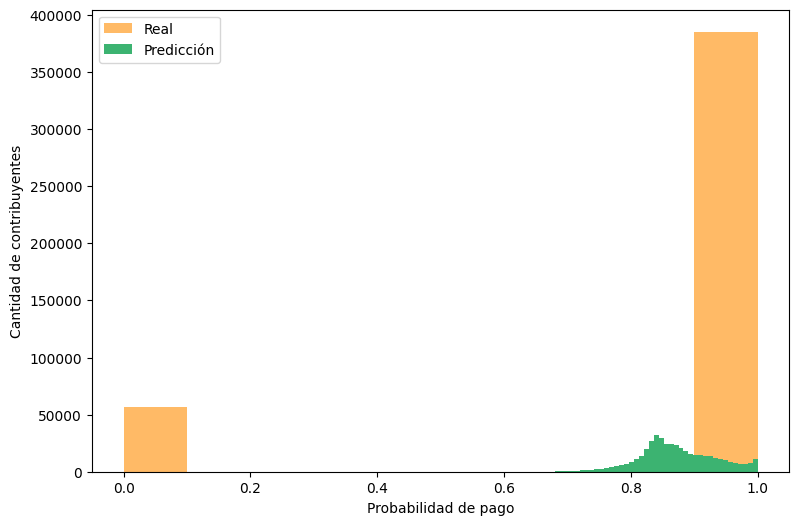

In [ ]:
fig, ax = plt.subplots()

LR_pred['Y_test'].plot(kind = 'hist', color='darkorange', label = 'Real', bins=10, alpha=0.6)
LR_pred['Y_pred'].plot(kind = 'hist', color='mediumseagreen', label = 'Predicción', bins=50)

ax.legend()
ax.set_xlabel('Probabilidad de pago')
ax.set_ylabel('Cantidad de contribuyentes')

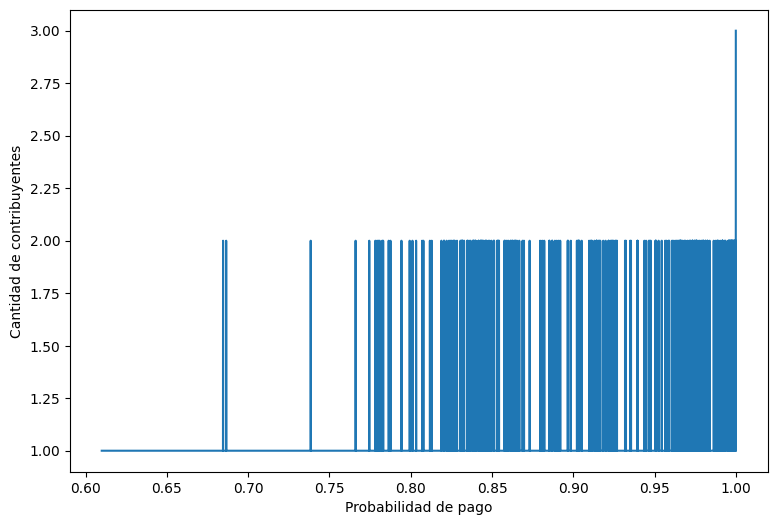

In [ ]:
plt.plot(pd.Series(LR_pred['Y_pred'].value_counts()).to_frame().sort_index())
plt.xlabel('Probabilidad de pago')
plt.ylabel('Cantidad de contribuyentes')
plt.rcParams["figure.figsize"] = [9,6]

## 6.3 Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# STEP 1: Feature Selection

#split dataset in features and target variable
feature_cols = FULL_GLOBAL_MOD.columns[~FULL_GLOBAL_MOD.columns.str.contains("Veri_pagos", case=False)]
# feature_cols = feature_cols.drop('Demora')
X = FULL_GLOBAL_MOD.drop(['Veri_pagos'], axis=1) # Features
Y = FULL_GLOBAL_MOD['Veri_pagos'] # Target variable

In [ ]:
# STEP 2: Split dataset into training set and test set
X_train = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']<2022].drop(['Veri_pagos'], axis=1)
Y_train = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']<2022]['Veri_pagos']
X_test = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']>=2022].drop(['Veri_pagos'], axis=1)
Y_test = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']>=2022]['Veri_pagos']

In [ ]:
## PARA LOS SPLIT ALEATORIOS

#split dataset in features and target variable
feature_cols = FULL_GLOBAL_MOD.columns[~FULL_GLOBAL_MOD.columns.str.contains("Veri_pagos", case=False)]
#feature_cols = feature_cols.drop('Demora')
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state=0)

In [ ]:
## STEP 3: Building Decision Tree Model

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

In [ ]:
## Y_predict como clasificación

Y_pred_clas = clf.predict(X_test)
Y_pred_clas

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
## Y_predict como probabilidad

# predict_proba

# It returns the matrix of probabilities that the predicted output is equal to zero or one.
# From the matrix, each row represents a single observation. 
# The first column is the probability that the product is not purchased(1-p(x)), 
# and the second column is the probability that the product is purchased(p(x)).

Y_pred = pd.DataFrame(clf.predict_proba(X_test), columns=['Prob_0', 'Prob_1'])['Prob_1']

In [ ]:
DT_pred = pd.DataFrame()
DT_pred['Y_test'] = Y_test.tolist()
DT_pred['Y_pred_clas'] = Y_pred_clas.tolist()
DT_pred['Y_pred'] = Y_pred.tolist()
DT_pred

Y_test  Y_pred_clas    Y_pred
0           0            1  0.860294
1           1            1  0.921935
2           1            1  0.822576
3           1            1  0.931207
4           1            1  0.949476
...       ...          ...       ...
39860       1            1  0.977823
39861       1            1  0.972291
39862       1            0  0.037273
39863       1            1  1.000000
39864       0            1  0.974622

[39865 rows x 3 columns]

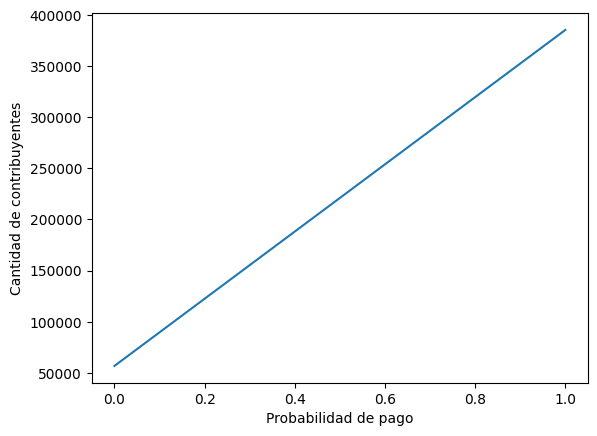

In [ ]:
plt.plot(pd.Series(DT_pred['Y_pred'].value_counts()).to_frame().sort_index())
plt.xlabel('Probabilidad de pago')
plt.ylabel('Cantidad de contribuyentes')
plt.rcParams["figure.figsize"] = [9,6]

Text(0, 0.5, 'Cantidad de contribuyentes')

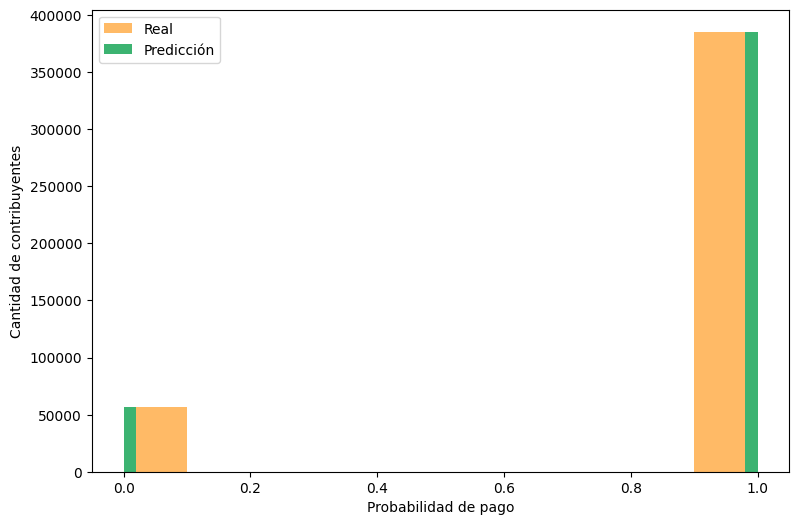

In [ ]:
fig, ax = plt.subplots()

DT_pred['Y_test'].plot(kind = 'hist', color='darkorange', label = 'Real', bins=10, alpha=0.6)
DT_pred['Y_pred'].plot(kind = 'hist', color='mediumseagreen', label = 'Predicción', bins=50)

ax.legend()
ax.set_xlabel('Probabilidad de pago')
ax.set_ylabel('Cantidad de contribuyentes')

In [ ]:
## STEP 4: Evaluating the Model

# Model Accuracy, how often is the classifier correct?
metrics.accuracy_score(Y_test, Y_pred)

0.9972063816648156

In [ ]:
# Evalúo el accuracy
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9750332072674288

In [ ]:
# Calculo el MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
rmse = mse**.5

In [ ]:
mse

0.0025877727736445294

In [ ]:
rmse

0.050870156021429004

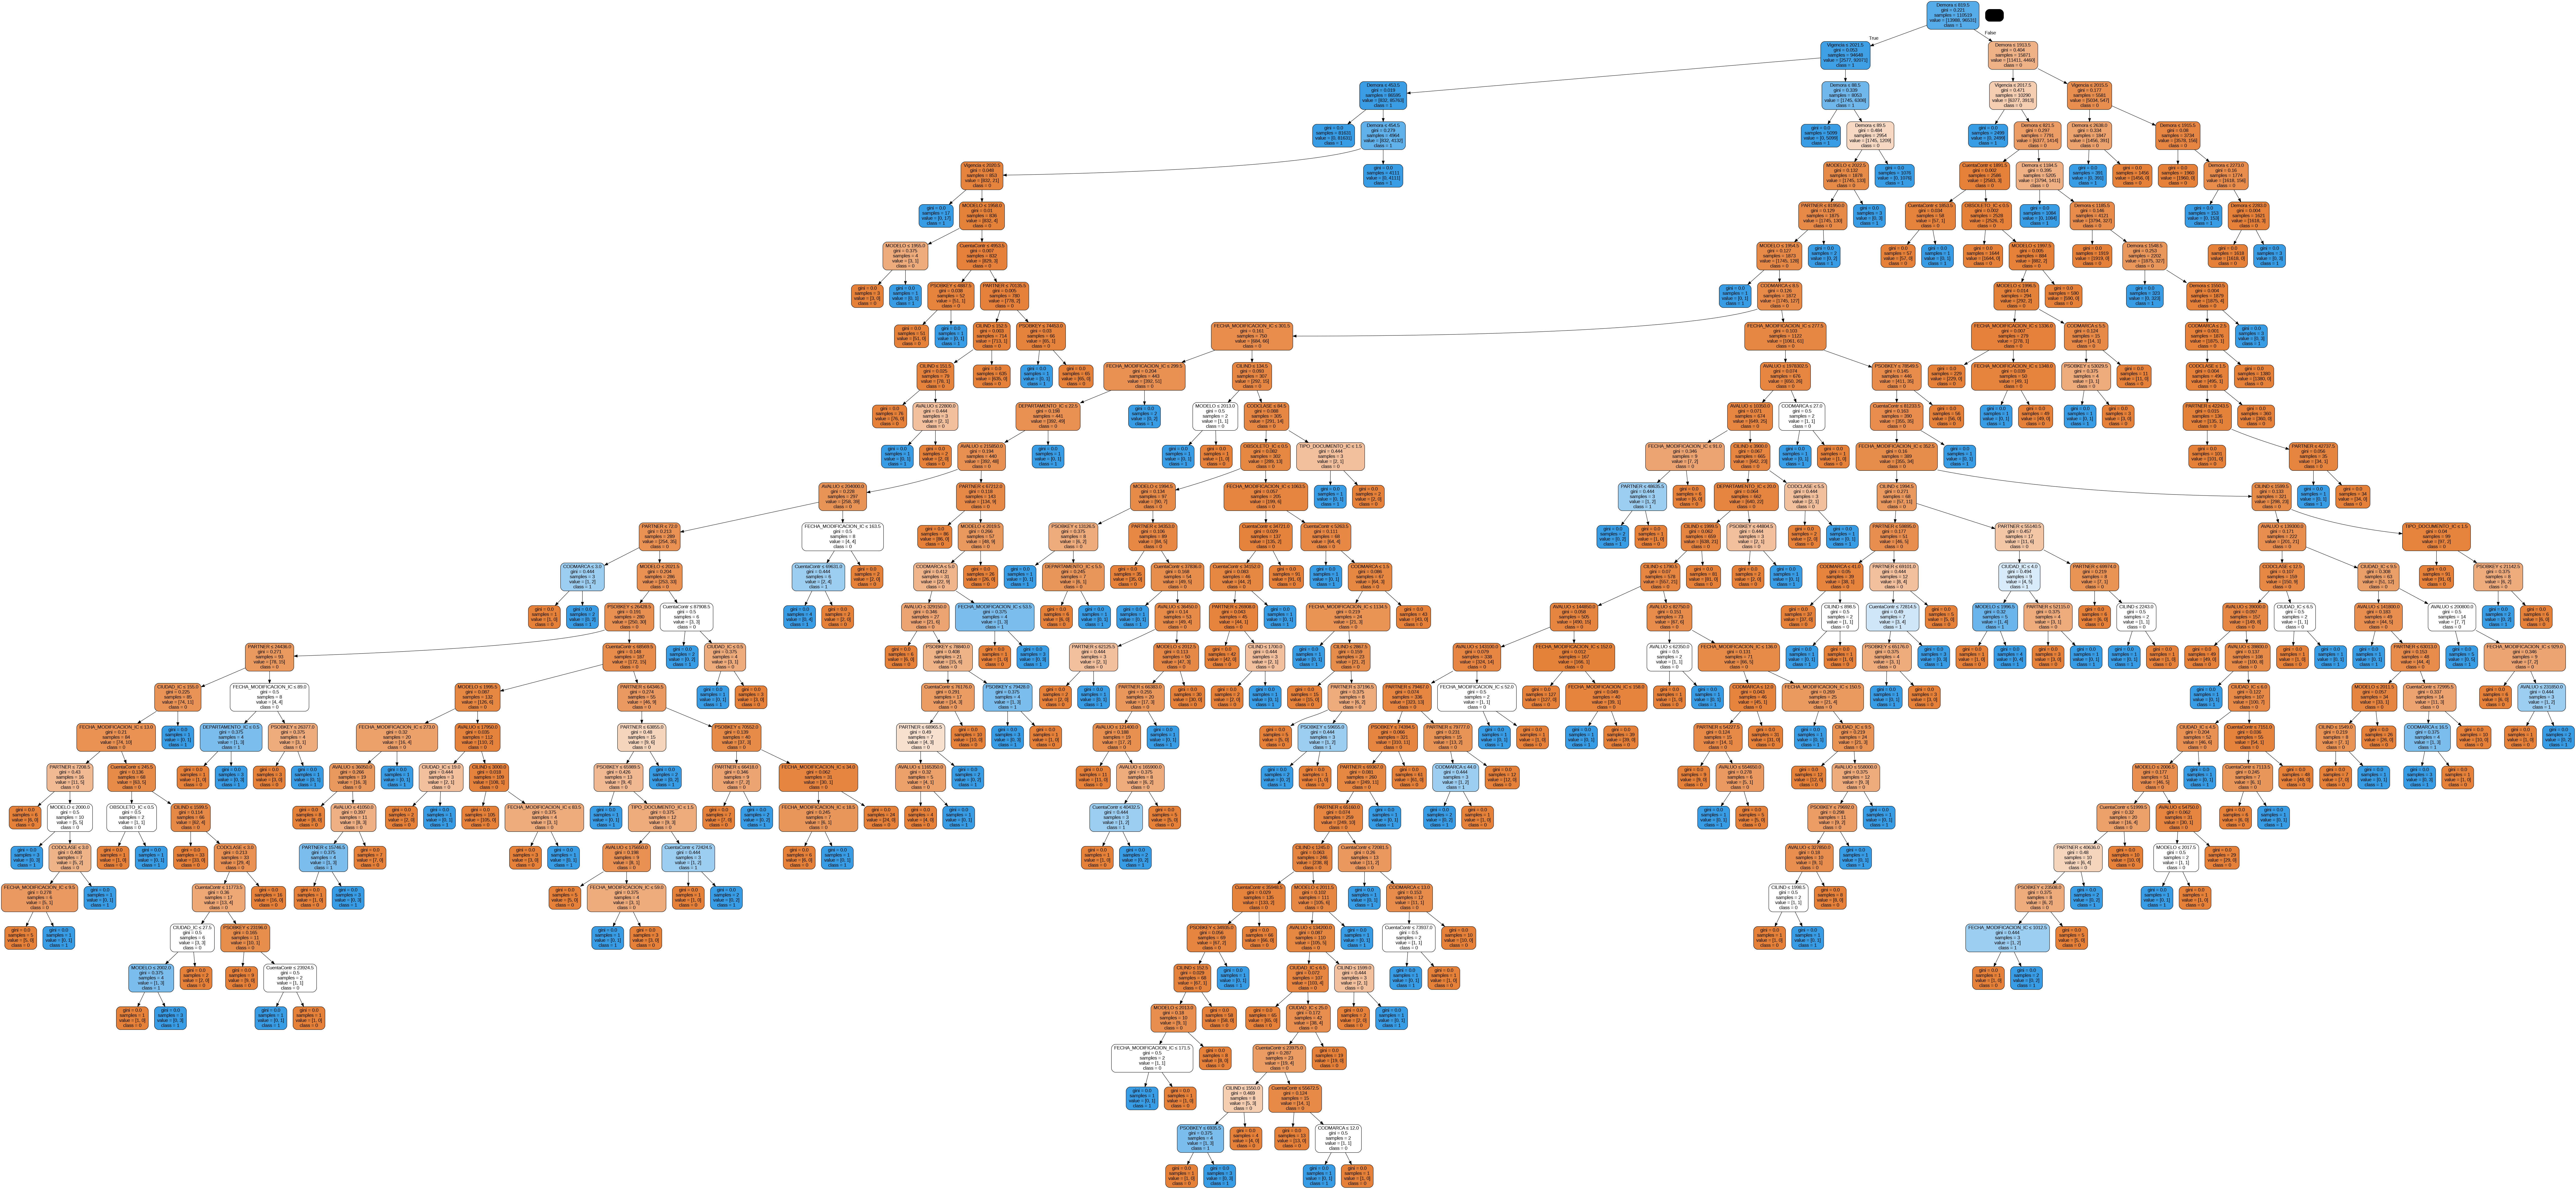

In [ ]:
## Visualizing Decision Trees

# pip install graphviz
# pip install pydotplus

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Vehículos.png')
Image(graph.create_png())

##6.4 Naive Bayes


In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, CategoricalNB

In [ ]:

## X, Y se necesitan para el regr.score
X = FULL_GLOBAL_MOD.drop(['Veri_pagos','Demora'], axis=1)
Y = FULL_GLOBAL_MOD['Veri_pagos']


In [ ]:
# SPLIT TRAIN TEST de acuerdo a año
X_train = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']<2022].drop(['Veri_pagos','Demora'], axis=1)
Y_train = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']<2022]['Veri_pagos']
X_test = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']>=2022].drop(['Veri_pagos','Demora'], axis=1)
Y_test = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']>=2022]['Veri_pagos']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state=0)

In [ ]:
## For text classification problems, the Multinomial Naive Bayes Classifier is well-suited:

#regressor = MultinomialNB().fit(X_train, Y_train)
regressor = GaussianNB().fit(X_train, Y_train)
#regressor = BernoulliNB().fit(X_train, Y_train)

regressor.fit(X_train, Y_train)

GaussianNB()

In [ ]:
## Y_predict como clasificación

Y_pred_clas = regressor.predict(X_test)
Y_pred_clas

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
## Y_predict como probabilidad

# predict_proba

# It returns the matrix of probabilities that the predicted output is equal to zero or one.
# From the matrix, each row represents a single observation. 
# The first column is the probability that the product is not purchased(1-p(x)), 
# and the second column is the probability that the product is purchased(p(x)).

Y_pred = pd.DataFrame(regressor.predict_proba(X_test), columns=['Prob_0', 'Prob_1'])['Prob_1']

In [ ]:
NB_pred = pd.DataFrame()
NB_pred['Y_test'] = Y_test.tolist()
NB_pred['Y_pred_clas'] = Y_pred_clas.tolist()
NB_pred['Y_pred'] = Y_pred.tolist()
NB_pred

Y_test  Y_pred_clas    Y_pred
0           0            1  0.860294
1           1            1  0.921935
2           1            1  0.822576
3           1            1  0.931207
4           1            1  0.949476
...       ...          ...       ...
39860       1            1  0.977823
39861       1            1  0.972291
39862       1            0  0.037273
39863       1            1  1.000000
39864       0            1  0.974622

[39865 rows x 3 columns]

In [ ]:
regressor.score(X,Y)

0.8481536306682254

In [ ]:
metrics.accuracy_score(Y_test, Y_pred_clas)

0.7530415151135081

In [ ]:
# Evalúo el accuracy
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

-0.2791991042395343

In [ ]:
# Calculo el MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
rmse = mse**.5


In [ ]:
mse

0.21844214832805026

In [ ]:
rmse

0.46737795019454037

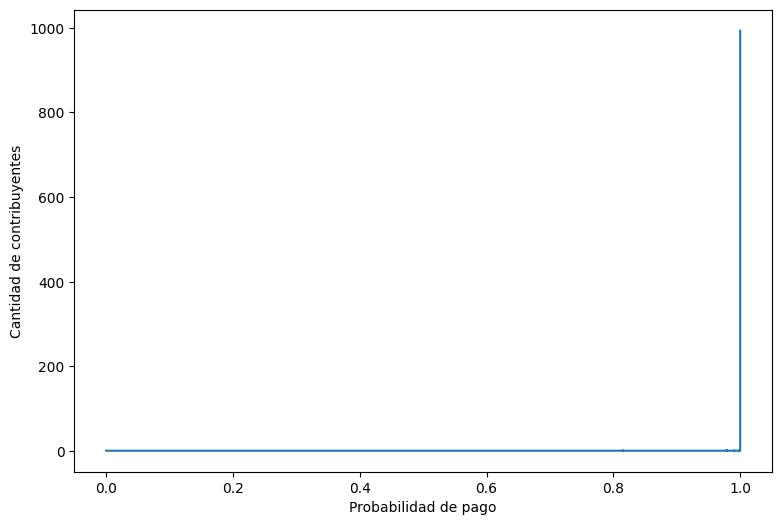

In [ ]:
plt.plot(pd.Series(NB_pred['Y_pred'].value_counts()).to_frame().sort_index())
plt.xlabel('Probabilidad de pago')
plt.ylabel('Cantidad de contribuyentes')
plt.rcParams["figure.figsize"] = [9,6]

Text(0, 0.5, 'Cantidad de contribuyentes')

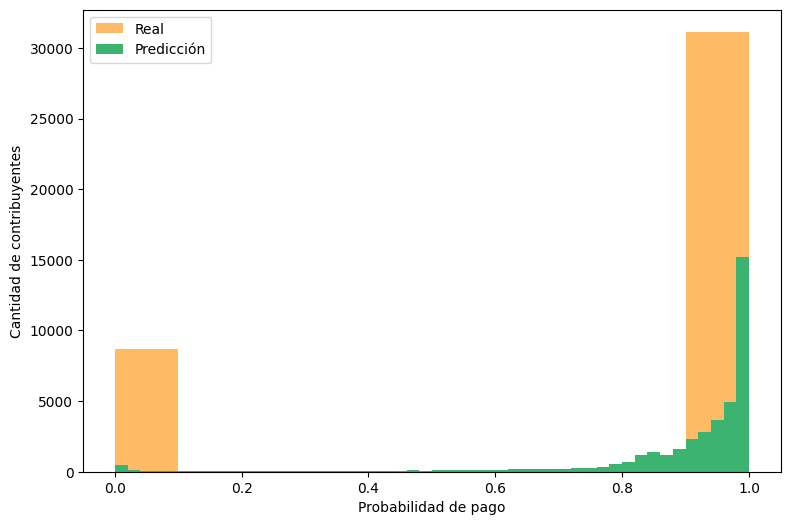

In [ ]:
fig, ax = plt.subplots()


NB_pred['Y_test'].plot(kind = 'hist', color='darkorange', label = 'Real', bins=10, alpha=0.6)
NB_pred['Y_pred'].plot(kind = 'hist', color='mediumseagreen', label = 'Predicción', bins=50)

ax.legend()
ax.set_xlabel('Probabilidad de pago')
ax.set_ylabel('Cantidad de contribuyentes')

## 6.5 PCA

In [ ]:
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [ ]:
## X, Y se necesitan para el regr.score
X = FULL_GLOBAL_MOD.drop(['Veri_pagos'], axis=1)
Y = FULL_GLOBAL_MOD['Veri_pagos']

In [ ]:
# STEP 2: Split dataset into training set and test set
X_train = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']<2022].drop(['Veri_pagos'], axis=1)
Y_train = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']<2022]['Veri_pagos']
X_test = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']>=2022].drop(['Veri_pagos'], axis=1)
Y_test = FULL_GLOBAL_MOD[FULL_GLOBAL_MOD['Vigencia']>=2022]['Veri_pagos']

In [ ]:
# Run standardization on X variables
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [ ]:
# Define cross-validation folds
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# # Linear Regression
# lin_reg = LinearRegression().fit(X_train_scaled, Y_train)
# lr_score_train = -1 * cross_val_score(lin_reg, X_train_scaled, Y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
# lr_score_test = mean_squared_error(Y_test, lin_reg.predict(X_test_scaled), squared=False)

# # Logistic Regression
# logistic_reg = LogisticRegression().fit(X_train_scaled, Y_train)
# logistic_score_train = -1 * cross_val_score(logistic_reg, X_train_scaled, Y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
# logistic_score_test = mean_squared_error(Y_test, logistic_reg.predict(X_test_scaled), squared=False)

# # Lasso Regression
# lasso_reg = LassoCV().fit(X_train_scaled, Y_train)
# lasso_score_train = -1 * cross_val_score(lasso_reg, X_train_scaled, Y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
# lasso_score_test = mean_squared_error(Y_test, lasso_reg.predict(X_test_scaled), squared=False)

# Ridge Regression
ridge_reg = RidgeCV().fit(X_train_scaled, Y_train)
ridge_score_train = -1 * cross_val_score(ridge_reg, X_train_scaled, Y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
ridge_score_test = mean_squared_error(Y_test, ridge_reg.predict(X_test_scaled), squared=False)

In [ ]:
# Generate all the principal components
pca = PCA() # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(X_train_scaled)

# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

0         1         2         3         4         5         6   \
0  0.538818 -0.056853  0.052044  0.191534  0.026795 -0.040226 -0.005108   
1  0.535715 -0.060661  0.051957  0.187569  0.026170 -0.032167 -0.004737   
2  0.510114 -0.101601  0.066039  0.183967  0.010555 -0.105451  0.001740   
3  0.005075 -0.001871  0.004659  0.009158 -0.014181 -0.027896 -0.933640   
4  0.172775  0.091995 -0.109433 -0.234856 -0.101169 -0.072576  0.091581   

         7         8         9         10        11        12        13  \
0  0.028096  0.006153 -0.057444  0.064067  0.004407 -0.037301 -0.017781   
1  0.026146  0.007385 -0.052077  0.067757  0.010978 -0.034328 -0.016988   
2  0.019996  0.004097 -0.036706 -0.025084 -0.060764 -0.053501 -0.003353   
3 -0.349430 -0.069783 -0.011587 -0.006676 -0.006926  0.001627 -0.000160   
4 -0.117244 -0.711489  0.498740  0.176517  0.017856  0.263829  0.008080   

         14        15        16  
0  0.023038 -0.335004  0.736186  
1  0.033391 -0.454063 -0.672896  
2 -0.085492  0.811540 -0.071804  
3 -0.001199  0.000363 -0.000138  
4 -0.027495  0.007235  0.001425

### Linear regression

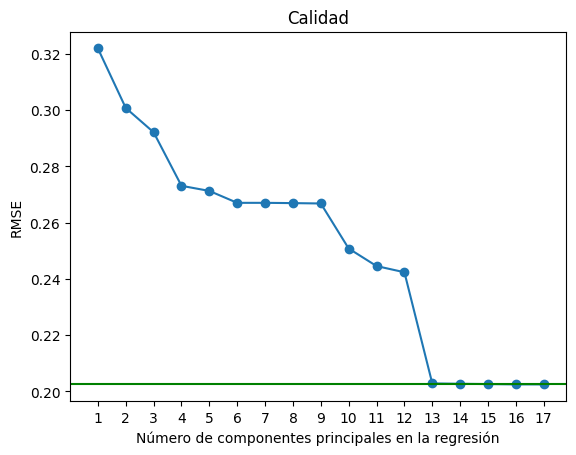

In [ ]:
# Initialize linear regression instance
lin_reg = LinearRegression()

# Create empty list to store RMSE for each iteration
rmse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      Y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
    
# Visual analysis - plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Número de componentes principales en la regresión')
plt.ylabel('RMSE')
plt.title('Calidad')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');

In [ ]:
# Visually determine optimal number of principal components
best_pc_num = 9

# Train model with first 9 principal components
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], Y_train)

# Get cross-validation RMSE (train set)
pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       Y_train, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()

# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], Y_train)

# Get first 13 principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]

# Predict on test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(Y_test, preds, squared=False)

In [ ]:
pcr_score_test

0.4109585015578769

In [ ]:
lin_reg_pc.score(X, Y)

In [ ]:
# Evalúo el accuracy
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

-0.2791991042395343

In [ ]:
# Calculo el MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, PCA_lin_pred['Y_pred_abs'])
rmse = mse**.5

In [ ]:
mse

0.1680306832642475

In [ ]:
rmse

0.40991545867928364

In [ ]:
normalized = (preds-min(preds))/(max(preds)-min(preds))

In [ ]:
PCA_lin_pred = pd.DataFrame()
PCA_lin_pred['Y_test'] = Y_test.tolist()
PCA_lin_pred['Y_pred'] = preds.tolist()
PCA_lin_pred['Y_pred_abs'] = 1-abs(1-abs(PCA_lin_pred['Y_pred'] ))
PCA_lin_pred

Y_test    Y_pred  Y_pred_abs
0           0  0.819056    0.819056
1           1  0.984068    0.984068
2           1  0.823547    0.823547
3           1  0.954242    0.954242
4           1  0.886066    0.886066
...       ...       ...         ...
39860       1  1.087071    0.912929
39861       1  1.073063    0.926937
39862       1  0.632015    0.632015
39863       1  1.127509    0.872491
39864       0  0.691519    0.691519

[39865 rows x 3 columns]

2

Text(0, 0.5, 'Cantidad de contribuyentes')

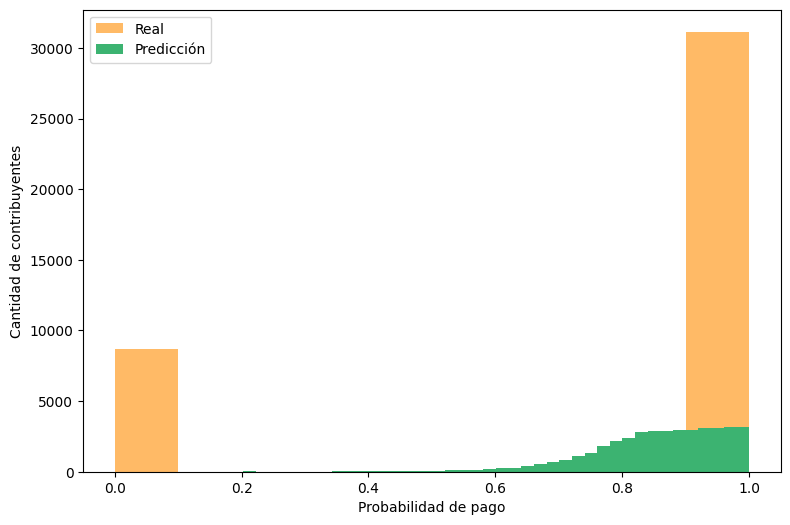

In [ ]:
fig, ax = plt.subplots()

PCA_lin_pred['Y_test'].plot(kind = 'hist', color='darkorange', label = 'Real', bins=10, alpha=0.6)
PCA_lin_pred['Y_pred_abs'].plot(kind = 'hist', color='mediumseagreen', label = 'Predicción', bins=50)

ax.legend()
ax.set_xlabel('Probabilidad de pago')
ax.set_ylabel('Cantidad de contribuyentes')

### Logistic Regression

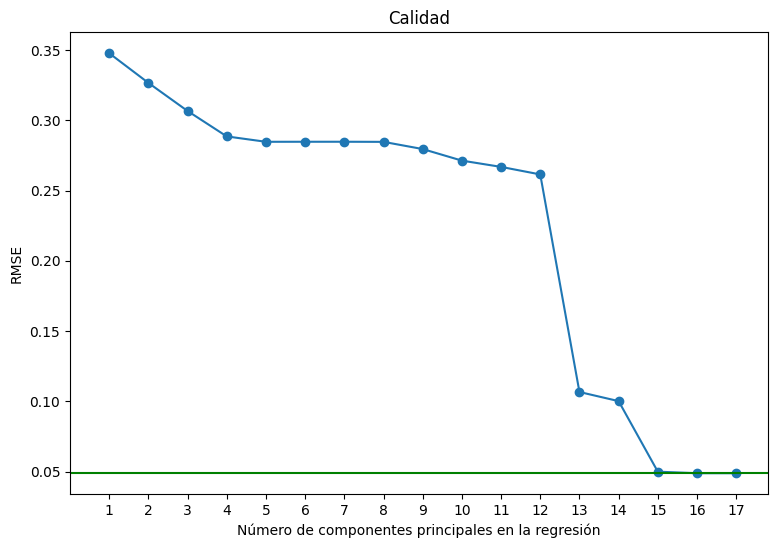

In [ ]:
# Initialize Logistic Regression instance
logistic_reg = LogisticRegression()

# Create empty list to store RMSE for each iteration
rmse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(logistic_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      Y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
    
# Visual analysis - plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Número de componentes principales en la regresión')
plt.ylabel('RMSE')
plt.title('Calidad')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=logistic_score_train, color='g', linestyle='-');

In [ ]:
# Visually determine optimal number of principal components
best_pc_num = 12

# Train model with first 9 principal components
logistic_reg_pc = LogisticRegression().fit(X_train_pc[:,:best_pc_num], Y_train)

# Get cross-validation RMSE (train set)
pcr_score_train = -1 * cross_val_score(logistic_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       Y_train, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()

# Train model on training set
logistic_reg_pc = LogisticRegression().fit(X_train_pc[:,:best_pc_num], Y_train)

# Get first 9 principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]

# Predict on test data
preds = logistic_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(Y_test, preds, squared=False)

In [ ]:
pcr_score_test

0.4828424554906931

In [ ]:
logistic_reg_pc.score(X[:,:best_pc_num], Y)

In [ ]:
# Evalúo el accuracy
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

-0.2791991042395343

In [ ]:
# Calculo el MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, PCA_log_pred['Y_pred_abs'])
rmse = mse**.5

In [ ]:
mse

0.23313683682428196

In [ ]:
rmse

0.4828424554906931

In [ ]:
PCA_log_pred = pd.DataFrame()
PCA_log_pred['Y_test'] = Y_test.tolist()
PCA_log_pred['Y_pred'] = preds.tolist()
PCA_log_pred['Y_pred_abs'] = 1-abs(1-abs(PCA_log_pred['Y_pred'] ))
PCA_log_pred

Y_test  Y_pred  Y_pred_abs
0           0       1           1
1           1       1           1
2           1       1           1
3           1       1           1
4           1       1           1
...       ...     ...         ...
39860       1       1           1
39861       1       1           1
39862       1       1           1
39863       1       1           1
39864       0       1           1

[39865 rows x 3 columns]

Text(0, 0.5, 'Cantidad de contribuyentes')

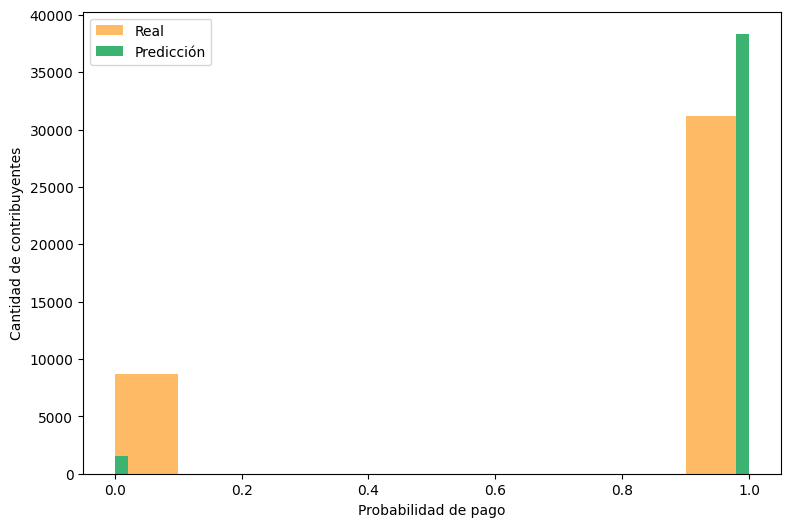

In [ ]:
fig, ax = plt.subplots()

PCA_log_pred['Y_test'].plot(kind = 'hist', color='darkorange', label = 'Real', bins=10, alpha=0.6)
PCA_log_pred['Y_pred_abs'].plot(kind = 'hist', color='mediumseagreen', label = 'Predicción', bins=50)

ax.legend()
ax.set_xlabel('Probabilidad de pago')
ax.set_ylabel('Cantidad de contribuyentes')

### Lasso Regression

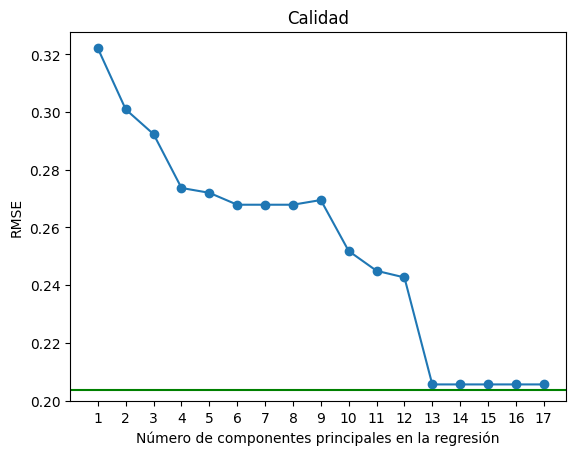

In [ ]:
# Initialize Lasso Regression instance
lasso_reg = LassoCV()

# Create empty list to store RMSE for each iteration
rmse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lasso_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      Y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
    
# Visual analysis - plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Número de componentes principales en la regresión')
plt.ylabel('RMSE')
plt.title('Calidad')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lasso_score_train, color='g', linestyle='-');

In [ ]:
# Visually determine optimal number of principal components
best_pc_num = 9

# Train model with first 9 principal components
lasso_reg_pc = LassoCV().fit(X_train_pc[:,:best_pc_num], Y_train)

# Get cross-validation RMSE (train set)
pcr_score_train = -1 * cross_val_score(lasso_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       Y_train, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()

# Train model on training set
lasso_reg_pc = LassoCV().fit(X_train_pc[:,:best_pc_num], Y_train)

# Get first 9 principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]

# Predict on test data
preds = lasso_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(Y_test, preds, squared=False)

In [ ]:
pcr_score_test

0.4122380755206153

In [ ]:
lasso_reg_pc.score(X, Y)

In [ ]:
# Evalúo el accuracy
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

-0.2791991042395343

In [ ]:
# Calculo el MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, PCA_lasso_pred['Y_pred_abs'])
rmse = mse**.5

In [ ]:
mse

0.16896855239513558

In [ ]:
rmse

0.41105784555842695

In [ ]:
PCA_lasso_pred = pd.DataFrame()
PCA_lasso_pred['Y_test'] = Y_test.tolist()
PCA_lasso_pred['Y_pred'] = preds.tolist()
PCA_lasso_pred['Y_pred_abs'] = 1-abs(1-abs(PCA_lasso_pred['Y_pred'] ))
PCA_lasso_pred

Y_test    Y_pred  Y_pred_abs
0           0  0.822842    0.822842
1           1  0.981145    0.981145
2           1  0.818842    0.818842
3           1  0.952932    0.952932
4           1  0.889397    0.889397
...       ...       ...         ...
39860       1  1.080656    0.919344
39861       1  1.069207    0.930793
39862       1  0.615358    0.615358
39863       1  1.134731    0.865269
39864       0  0.686102    0.686102

[39865 rows x 3 columns]

Text(0, 0.5, 'Cantidad de contribuyentes')

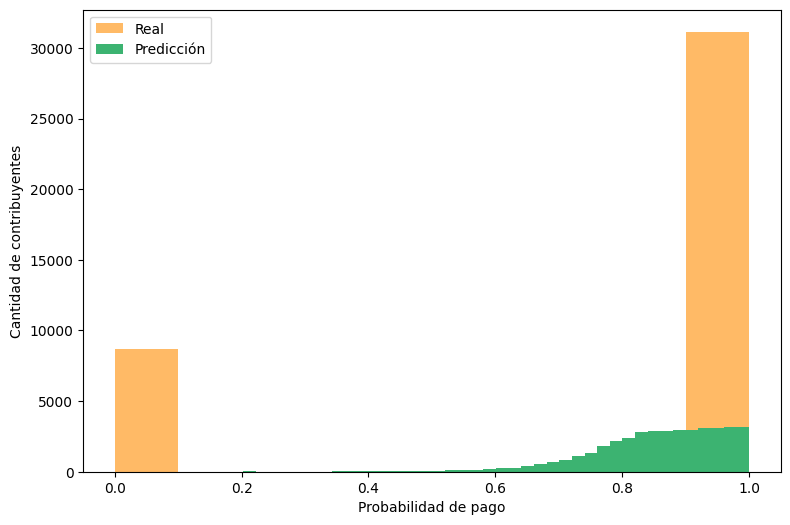

In [ ]:
fig, ax = plt.subplots()

PCA_lasso_pred['Y_test'].plot(kind = 'hist', color='darkorange', label = 'Real', bins=10, alpha=0.6)
PCA_lasso_pred['Y_pred_abs'].plot(kind = 'hist', color='mediumseagreen', label = 'Predicción', bins=50)

ax.legend()
ax.set_xlabel('Probabilidad de pago')
ax.set_ylabel('Cantidad de contribuyentes')

### Ridge Regression

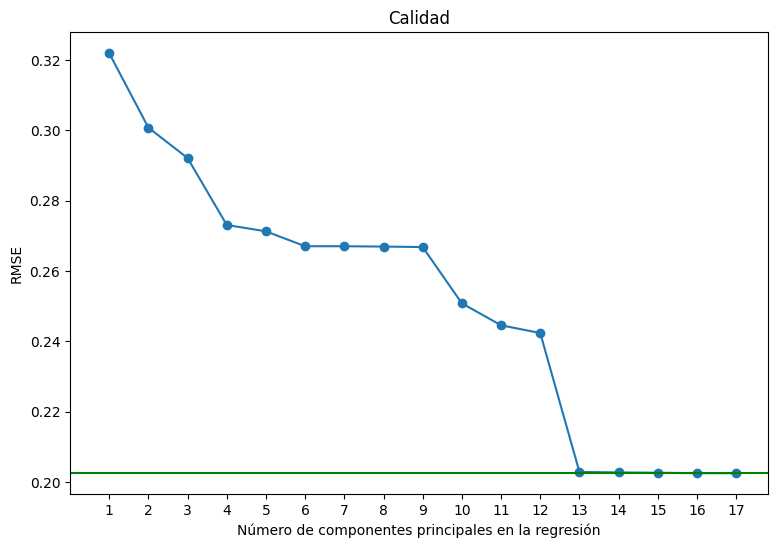

In [ ]:
# Initialize linear regression instance
ridge_reg = RidgeCV()

# Create empty list to store RMSE for each iteration
rmse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(ridge_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      Y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
    
# Visual analysis - plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Número de componentes principales en la regresión')
plt.ylabel('RMSE')
plt.title('Calidad')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=ridge_score_train, color='g', linestyle='-');

In [ ]:
# Visually determine optimal number of principal components
best_pc_num = 6

# Train model with first 9 principal components
ridge_reg_pc = RidgeCV().fit(X_train_pc[:,:best_pc_num], Y_train)

# Get cross-validation RMSE (train set)
pcr_score_train = -1 * cross_val_score(ridge_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       Y_train, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()

# Train model on training set
ridge_reg_pc = RidgeCV().fit(X_train_pc[:,:best_pc_num], Y_train)

# Get first 9 principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]

# Predict on test data
preds = ridge_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(Y_test, preds, squared=False)

In [ ]:
pcr_score_test

0.4124184007670256

In [ ]:
ridge_reg_pc.score(X, Y)

In [ ]:
# Evalúo el accuracy
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

-0.2791991042395343

In [ ]:
# Calculo el MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, PCA_ridge_pred['Y_pred_abs'])
rmse = mse**.5

In [ ]:
mse

0.1680306832642475

In [ ]:
rmse

0.40991545867928364

In [ ]:
PCA_ridge_pred = pd.DataFrame()
PCA_ridge_pred['Y_test'] = Y_test.tolist()
PCA_ridge_pred['Y_pred'] = preds.tolist()
PCA_ridge_pred['Y_pred_abs'] = 1-abs(1-abs(PCA_ridge_pred['Y_pred'] ))
PCA_ridge_pred

Y_test    Y_pred  Y_pred_abs
0           0  0.822842    0.822842
1           1  0.981145    0.981145
2           1  0.818842    0.818842
3           1  0.952932    0.952932
4           1  0.889397    0.889397
...       ...       ...         ...
39860       1  1.080656    0.919344
39861       1  1.069207    0.930793
39862       1  0.615358    0.615358
39863       1  1.134731    0.865269
39864       0  0.686102    0.686102

[39865 rows x 3 columns]

Text(0, 0.5, 'Cantidad de contribuyentes')

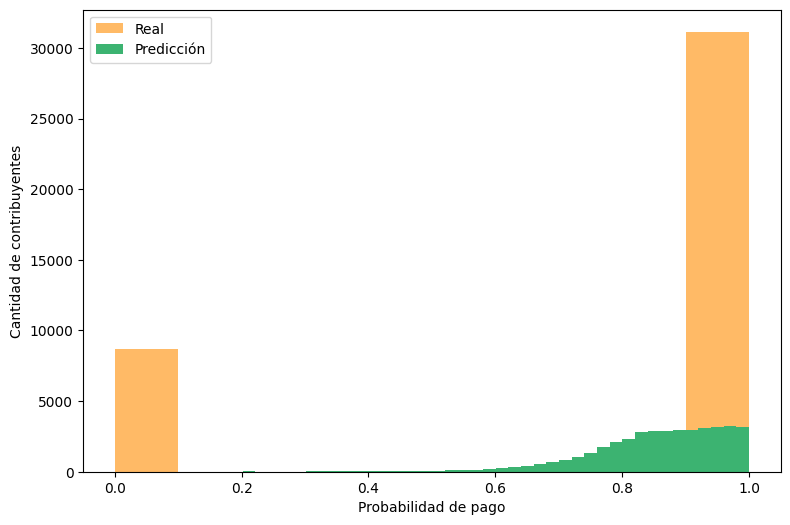

In [ ]:
fig, ax = plt.subplots()

PCA_ridge_pred['Y_test'].plot(kind = 'hist', color='darkorange', label = 'Real', bins=10, alpha=0.6)
PCA_ridge_pred['Y_pred_abs'].plot(kind = 'hist', color='mediumseagreen', label = 'Predicción', bins=50)

ax.legend()
ax.set_xlabel('Probabilidad de pago')
ax.set_ylabel('Cantidad de contribuyentes')